# MalikAdan: Prediction of temperature using hydrogeochemical concentrations in geothermal reservoirs with machine learning algorithms

Author: Adan Malik, Petroleum Engineer, Pakistan Petroleum Limited. [Bio at the bottom]


## Purpose
In this notebook, we explore the application of machine learning techniques for predicting the temperatures of geothermal reservoirs, utilizing hydrogeochemical data. This study exclusively focuses on a regression-based approach, aiming to forecast the temperature of geothermal reservoirs as a continuous numerical value.

## Methodology
For the regression analysis, following machine learning models are used,  
1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. ElasticNet Regression
5. Support Vector Machine (SVM)
6. K-Nearest Neighbors
7. Decision Tree
8. Random Forest Regressor

To enhance the accuracy and reliability of our predictions, the study incorporates data preprocessing methods. This involves normalizing the hydrogeochemical data and implementing outlier detection techniques, which are essential for refining the machine learning models' performance. Additionally, a feature importance analysis is conducted to identify the key hydrogeochemical parameters that most significantly influence geothermal reservoir temperatures. This aspect of the study is crucial for gaining deeper insights into the geothermal processes and for further improving the predictive capabilities of the models.


## Results
1. The observed dataset exhibits a weak correlation between predictor and response variables, leading to suboptimal performance of linear regression models. The high Mean Square Error (MSE) values indicate a significant deviation of the model predictions from the actual data.
2. A set of eight machine learning algorithms was used to analyze the hydrogeochemical dataset. During both training and testing phases, these models achieved moderate levels of accuracy. Notably, the Decision Tree and Random Forest Regression models demonstrated better performance, achieving MSEs of 0.742 and 0.883, respectively.
3. A correlation analysis revealed that SiO<sub>2</sub>, Na, and Cl concentrations exhibit a relatively strong positive correlation (exceeding 0.2) with geothermal reservoir temperatures, suggesting their potential as predictive indicators in the models.
4. Feature importance ranking analysis identified SiO<sub>2</sub> (measured in mg/L) as the most critical predictor in base cases of both Decision Tree and Random Forest models.
5. Based on their minimal impact on model performance, Boron (mg/L) and Potassium (K, measured in mg/L) were excluded from the dataset, streamlining the feature set for more efficient model training.
6. The predictive accuracy of the machine learning models is anticipated to improve with the integration of additional predictor variables and an expanded dataset, enhancing the models' ability to capture complex relationships within the data.
7. Hyperparameter tuning will be done to look for improvements in model performance.

## Suggested next steps
In future, a robust cross-validation strategy could be employed to assess the models' generalizability across various datasets. This will ensure that the predictive models would be applicable and reliable in different geothermal contexts.

# Library import




We import all the required Python libraries

In [2]:
# Data manipulation
import pandas as pd                                         # DataFrames
import numpy as np                                          # arrays and matrix math
from sklearn.preprocessing import StandardScaler            # to normalize the data

# Visualizations
import matplotlib.pyplot as plt                             # for plotting
plt.rc('axes', axisbelow=True)                              # set axes and grids in the background for all plots
import seaborn as sns                                       # for impressive visualization

# Others
import math                                                 # for square root
from scipy.stats import pearsonr                            # for pearson correlation
from datetime import datetime                               # for time 

# Sklearn libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase except pH, while all the 
other variables follow Python's guidelines.

# Data import

In [3]:
# Since the data is separated by tabs, we'll use '\t' as the separator.
# We don't have column names in the file, so we'll need to create them.

# Creating a list of column names
column_names = [f'Column{i+1}' for i in range(9)]

# Now, let's create the DataFrame using the data
df = pd.read_csv("data.txt", sep='\t', header=None, names=column_names)

In [4]:
# predictorNames = {'Temperature', 'pH', 'ECConductivity', 'Kmgl', 'Namgl', 'Boronmgl', 'SiO2mgl', 'Clmgl'};

df.rename(columns={"Column1": "ID", "Column2":"Temperature", "Column3": "pH", "Column4":"ECConductivity",
                   "Column5":"Kmgl", "Column6":"Namgl", "Column7":"Boronmgl", "Column8":"SiO2mgl",
                   "Column9":"Clmgl"}, inplace=True)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,59.0,30.000000,17.175564,1.0,15.500,30.0,44.50,59.0
Temperature,59.0,48.942373,15.242004,23.4,37.050,45.5,59.50,86.0
pH,59.0,7.412881,0.840589,5.8,6.855,7.3,8.00,9.1
ECConductivity,59.0,2151.457627,1630.151699,350.0,1080.000,1755.0,2940.00,10330.0
Kmgl,59.0,35.090339,37.080478,0.8,4.500,19.0,60.00,155.0
Namgl,59.0,347.950847,336.713517,2.6,74.500,240.0,545.00,1810.0
Boronmgl,59.0,4.921186,5.580162,0.0,0.250,1.9,8.95,20.0
SiO2mgl,59.0,81.852542,71.314051,11.0,37.250,53.0,100.00,375.0
Clmgl,59.0,124.703390,416.843514,2.6,17.000,58.0,90.00,3150.0


In [6]:
#Delete the ID Column in the dataframe
df.drop(['ID'], axis=1, inplace=True)
df.head(n=3)

,Temperature,pH,ECConductivity,Kmgl,Namgl,Boronmgl,SiO2mgl,Clmgl
0,40.5,6.10,1500.0,3.6,45.0,0.0,43.0,16.0
1,38.2,7.40,1772.0,84.0,51.0,0.0,43.0,25.0
2,51.0,9.05,1300.0,5.5,265.0,2.7,38.0,71.0


In [7]:
print("Total number of predictor features: ", len(df.columns) - 1)
print("The reponse feature is Temperature")

Total number of predictor features:  7
The reponse feature is Temperature


# Data pre-processing

## Basic Data pre-processing

Categorise the temperatures according to the following condition for the better understanding of the dataset.
1. T < 30: "low",
2. 30 < T > 60: "medium",
3. T > 60: "high".

In [8]:
# Function to categorize temperature
def categorize_temperature(temp):
    if temp < 30:
        return 'low'
    elif 30 <= temp <= 60:
        return 'medium'
    else:
        return 'high'
    
df['T_category'] = df['Temperature'].apply(categorize_temperature)

In [9]:
df.head(n=7)

,Temperature,pH,ECConductivity,Kmgl,Namgl,Boronmgl,SiO2mgl,Clmgl,T_category
0,40.5,6.10,1500.0,3.6,45.0,0.0,43.0,16.0,medium
1,38.2,7.40,1772.0,84.0,51.0,0.0,43.0,25.0,medium
2,51.0,9.05,1300.0,5.5,265.0,2.7,38.0,71.0,medium
3,58.0,8.80,1160.0,4.2,227.0,1.4,50.0,62.0,medium
4,78.0,8.50,2000.0,21.0,430.0,7.1,132.0,265.0,high
5,60.0,9.00,1440.0,3.8,230.0,2.0,56.0,845.0,medium
6,34.0,8.70,1000.0,0.8,2.6,0.5,30.0,59.0,medium


Check the temperature distribution in the dataframe using the histogram

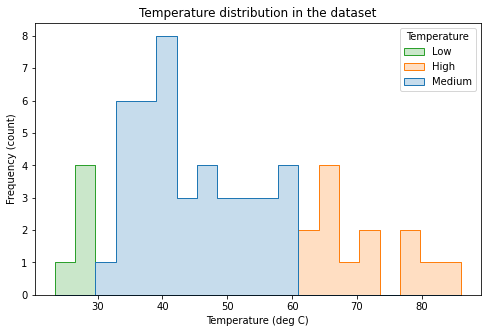

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Temperature', hue='T_category', bins=20, element="step")
plt.legend(title='Temperature',labels=['Low','High','Medium'])
plt.ylabel("Frequency (count)")
plt.xlabel("Temperature (deg C)")
plt.title("Temperature distribution in the dataset")
plt.show()

Observation: The temperature distribution shows that the medium temperature ranges have the highest frequency, followed by high temperature values.

Visualize the predictor features with respective to the response feature

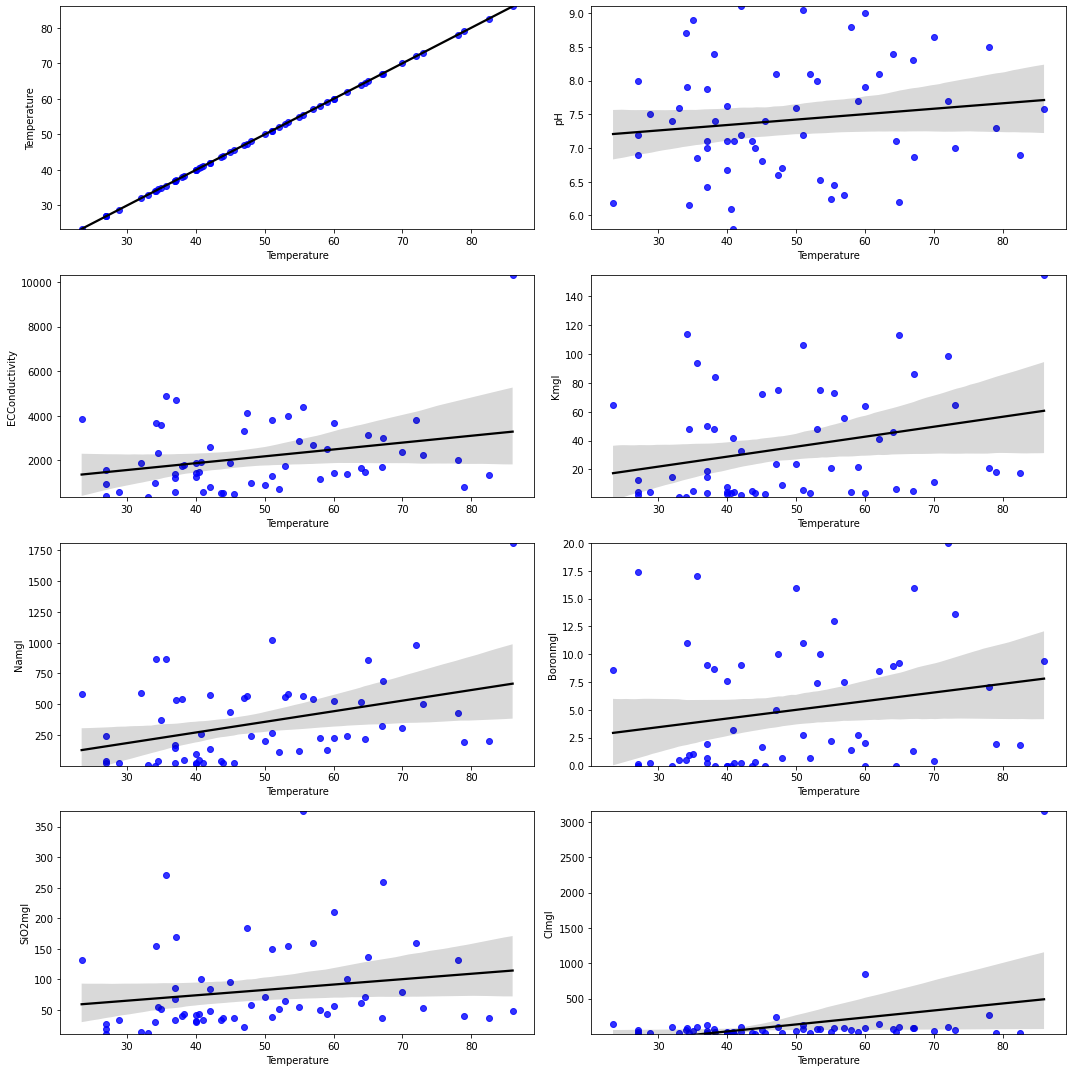

In [11]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop over each column (other than Temperature) to create a subplot with a regression line
for i, column in enumerate(df.columns):
    if i > 7:
        break
    ax = axes[i]
    sns.regplot(x='Temperature', y=column, data=df, ax=ax, color="blue", line_kws={"color": "black"})
    ax.set_ylabel(column)
    ax.set_xlabel('Temperature')

    # Set y-axis limits to cover the maximum range of values
    ax.set_ylim(df[column].min(), df[column].max())

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

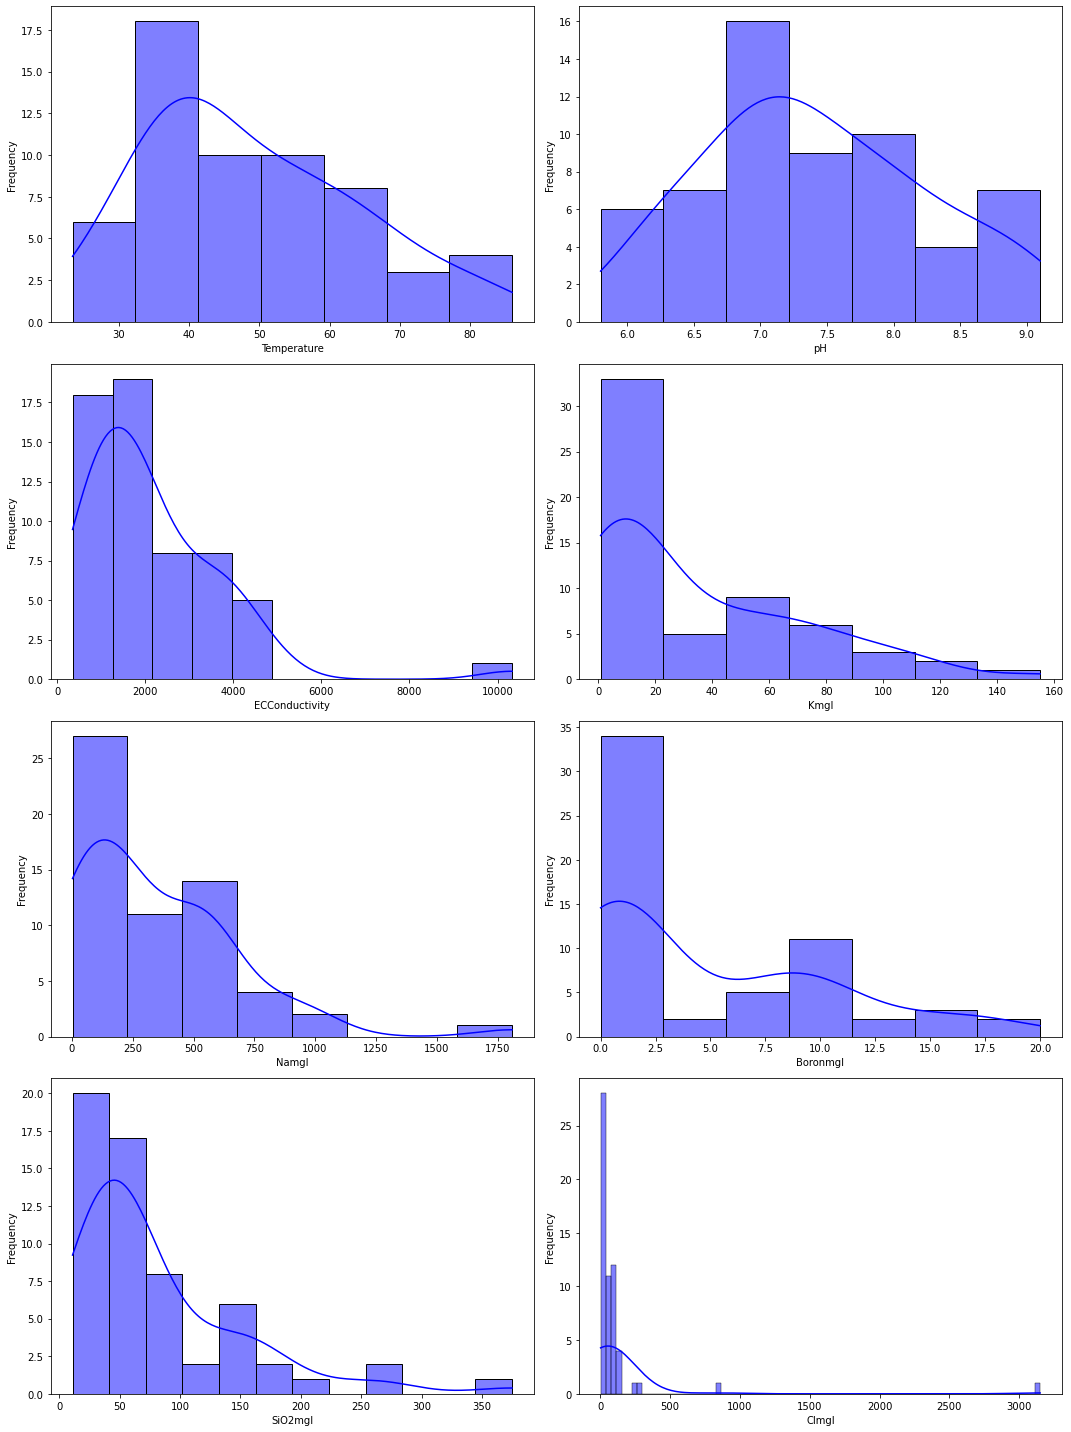

In [12]:
# Create a figure and a set of subplots for histograms
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop over each column to create a histogram
for i, column in enumerate(df.columns):
    if i > 7:
        break
    ax = axes[i]
    sns.histplot(df[column], ax=ax, kde=True, color="blue")
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Dataframe columns for reference in determining distribution types
df_columns = df.columns.tolist()


Observation: Most of the distributions are right-skewed, meaning that the majority of values are concentrated on the lower side of the scale with fewer high-value outliers. 

In [13]:
#identifying the rows containing the outliers 
df[(df['Clmgl']>3000) | (df['SiO2mgl']>300) | (df['Namgl'] > 1500) | (df['ECConductivity']>8000) | (df['Clmgl']>500)]

,Temperature,pH,ECConductivity,Kmgl,Namgl,Boronmgl,SiO2mgl,Clmgl,T_category
5,60.0,9.00,1440.0,3.8,230.0,2.0,56.0,845.0,medium
37,55.5,6.45,4401.0,73.0,564.0,13.0,375.0,87.0,medium
45,86.0,7.58,10330.0,155.0,1810.0,9.4,49.0,3150.0,high


In [14]:
df.drop(index=[5, 37, 45], inplace=True)

In [15]:
print("The total number of rows left after removal: ", len(df))

The total number of rows left after removal:  56


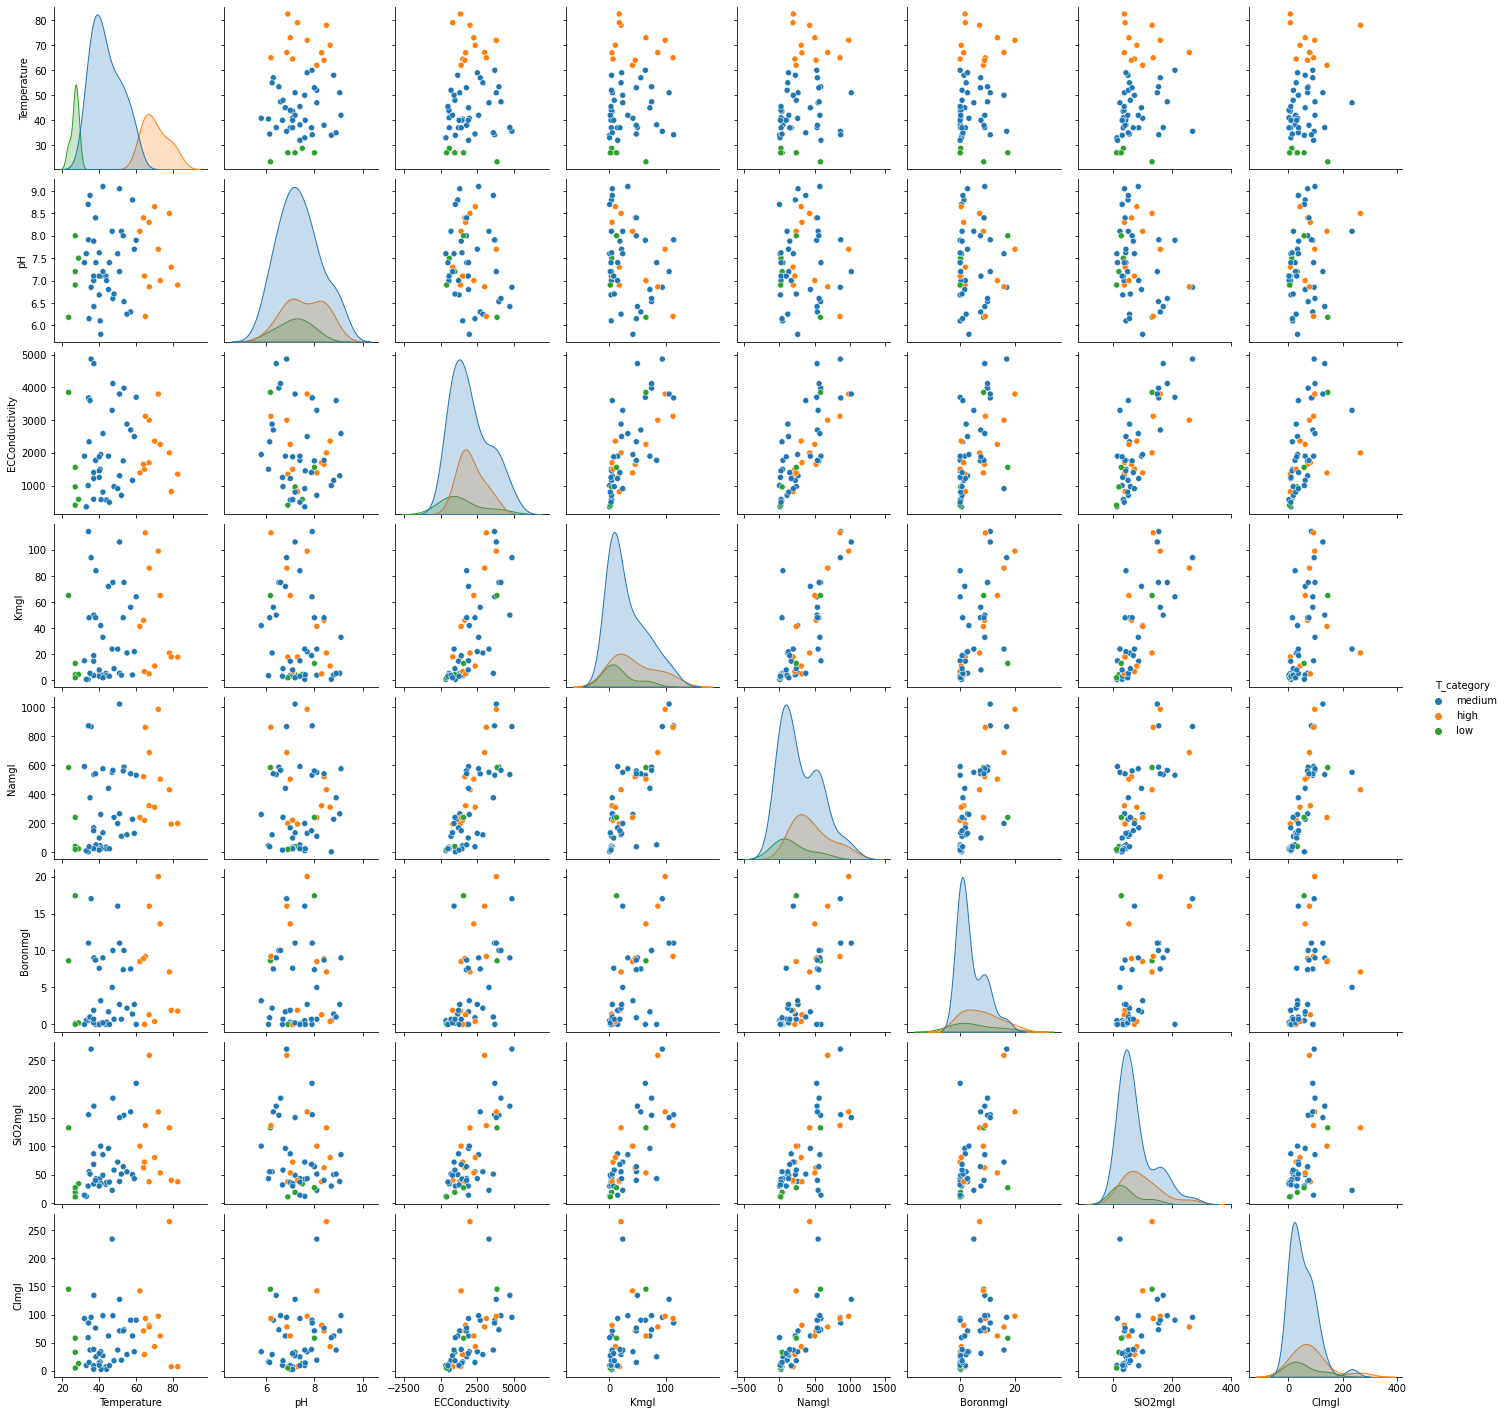

In [16]:
sns.pairplot(df, hue='T_category')

## Advanced Data Pre-processing and Feature Selection

### Initial Setup

In [17]:
#reset the rows of the dataframe which was affected by the data removal process
df = df.reset_index()

Divide the df into two new dataframes:
1. dfp = predictor features only
2. dfr = response feature only
3. dft = dfp+dfr

In [18]:
df.columns

Index(['index', 'Temperature', 'pH', 'ECConductivity', 'Kmgl', 'Namgl',
       'Boronmgl', 'SiO2mgl', 'Clmgl', 'T_category'],
      dtype='object')

In [19]:
dft = df.copy()
dfp = df.drop(columns=['Temperature', 'T_category', 'index'])
dfr = df[['Temperature']]

In [24]:
#drop category column in dft for standardization
dft = dft.drop(columns=['T_category'])

### Standardize the features <br>
Standardization is a very important concept in feature scaling which is an integral part of feature engineering. When you collect data for data analysis or machine learning, we will be having a lot of features, which are independent features. With the help of the independent features, we will try to predict the dependent feature in supervised learning. While seeing the data if you see there will be more noise in the data which will put the model at risk of being influenced by the outliers. So for this, we will commonly normalize or standardize the data.

Reference: [GeeksforGeeks](https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/)

In [25]:
#create objects of StandardScaler()
p_scaler = StandardScaler()
r_scaler = StandardScaler()
t_scaler = StandardScaler()

# p_std contain the standardized data for predictor features
p_std = p_scaler.fit_transform(dfp)
r_std = r_scaler.fit_transform(dfr)
t_std = t_scaler.fit_transform(dft)

#create the dataframes for standardized data
dfp_std = pd.DataFrame(p_std, columns=dfp.columns)
dfr_std = pd.DataFrame(r_std, columns=dfr.columns)
dft_std = pd.DataFrame(t_std, columns=dft.columns)

Check the statistics for the predictor features

In [26]:
dfp_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pH,56.0,-6.938894e-16,1.00905,-1.953783,-0.661445,-0.181783,0.734769,2.079045
ECConductivity,56.0,-1.675247e-16,1.00905,-1.362142,-0.824547,-0.209555,0.641812,2.419851
Kmgl,56.0,2.557478e-16,1.00905,-0.957508,-0.845408,-0.428397,0.558081,2.426410
Namgl,56.0,2.180795e-17,1.00905,-1.141229,-0.972646,-0.289686,0.790468,2.515839
Boronmgl,56.0,0.000000e+00,1.00905,-0.859300,-0.823112,-0.524562,0.723919,2.759485
SiO2mgl,56.0,4.559845e-17,1.00905,-1.098356,-0.673289,-0.422861,0.367962,3.168796
Clmgl,56.0,-1.784287e-17,1.00905,-1.046223,-0.800068,-0.336774,0.519618,3.865633


Check the statistics for the response features

In [27]:
dfr_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,56.0,2.260097e-16,1.00905,-1.686454,-0.752818,-0.237945,0.705989,2.370745


In [28]:
dft_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,56.0,2.775558e-17,1.00905,-1.704303,-0.837459,-0.029385,0.837459,1.704303
Temperature,56.0,2.260097e-16,1.00905,-1.686454,-0.752818,-0.237945,0.705989,2.370745
pH,56.0,-6.938894e-16,1.00905,-1.953783,-0.661445,-0.181783,0.734769,2.079045
ECConductivity,56.0,-1.675247e-16,1.00905,-1.362142,-0.824547,-0.209555,0.641812,2.419851
Kmgl,56.0,2.557478e-16,1.00905,-0.957508,-0.845408,-0.428397,0.558081,2.426410
Namgl,56.0,2.180795e-17,1.00905,-1.141229,-0.972646,-0.289686,0.790468,2.515839
Boronmgl,56.0,0.000000e+00,1.00905,-0.859300,-0.823112,-0.524562,0.723919,2.759485
SiO2mgl,56.0,4.559845e-17,1.00905,-1.098356,-0.673289,-0.422861,0.367962,3.168796
Clmgl,56.0,-1.784287e-17,1.00905,-1.046223,-0.800068,-0.336774,0.519618,3.865633


In [29]:
#remove the index column in dft_std
dft_std = dft_std.drop(columns=['index'])

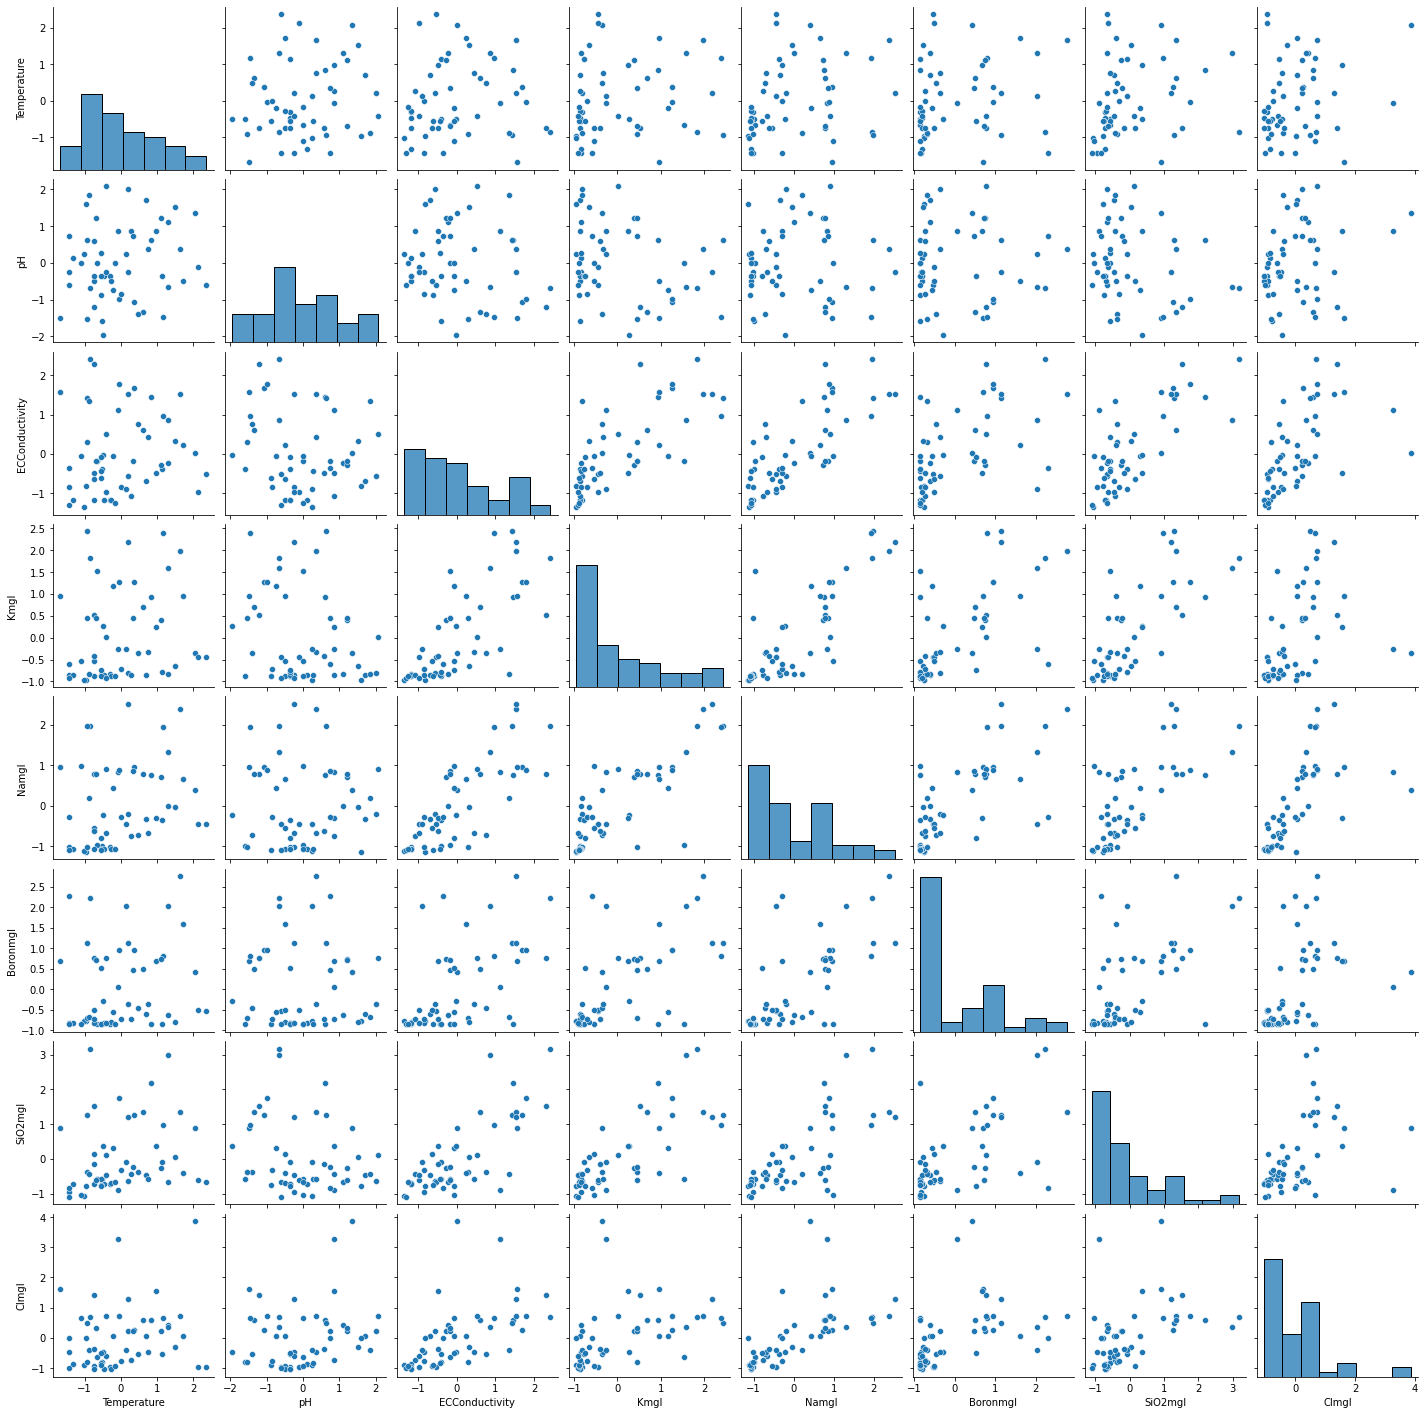

In [30]:
sns.pairplot(data=dft_std)

### Conditional Statistics

The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation. As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation. <br>

The correlation coefficient has values between -1 to 1 
1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2. A value closer to 1 implies stronger positive correlation
3. A value closer to -1 implies stronger negative correlation<br>

Reference: [Feature Selection with Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

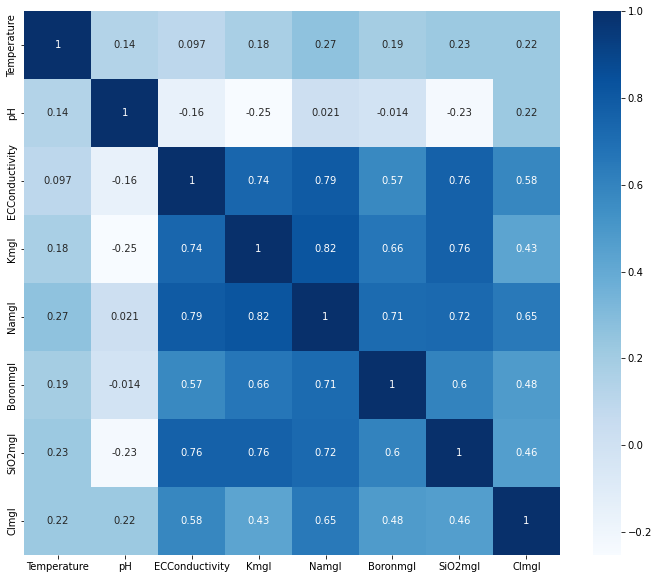

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dft_std.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

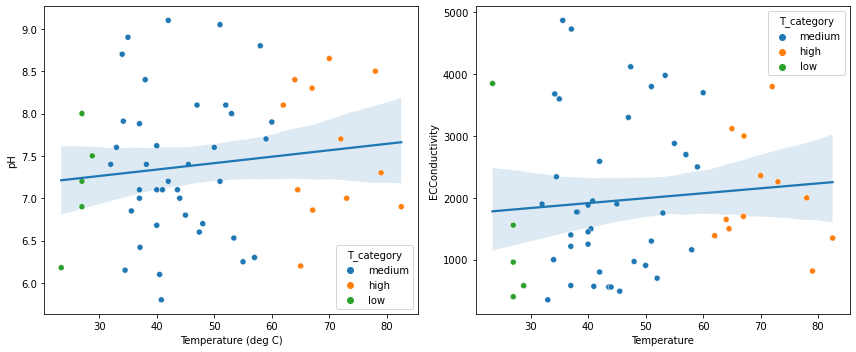

In [89]:
fig,axs = plt.subplots(1,2, figsize=(12,5))

#axs[0].scatter(df['Temperature'], df['pH'])

sns.regplot(data=df, x='Temperature', y='pH', ax=axs[0], marker='.')
sns.scatterplot(data=df, x='Temperature', y='pH', ax=axs[0], hue='T_category')
axs[0].set_ylabel("pH")
axs[0].set_xlabel("Temperature (deg C)")

sns.regplot(data=df, x='Temperature', y='ECConductivity', ax=axs[1], marker='.', order=1)
sns.scatterplot(data=df, x='Temperature', y='ECConductivity', ax=axs[1], hue='T_category')
axs[1].set_ylabel("ECConductivity")
fig.tight_layout()
plt.show()

Observation:
1. ECConductivity and pH has the lowest correlation with the temperature. Therefore, we can neglect this in our machine learning model.
2. Na exhibit the highest positive correlation with the temperature.
3. In general, SiO2, Na, and Cl have the relatively stronger positive correlation (>0.2) with Temperature.
4. All the predictor features have the positive correlation with the response feature.

### Feature Ranking

#### Random Forest Regressor

In [130]:
# Create a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

X = dfp_std.copy()
y = dfr_std.copy()

regressor.fit(X, y)

# Get feature importances
feature_importances = regressor.feature_importances_

# Create a DataFrame for easier visualization
feature_names = [f'{i}' for i in dfp_std.columns]
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_31036\1136511613.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


#### Linear Regression

In [129]:
# Assuming X and y are defined, and dfp_std is your DataFrame of features
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coefficients = model.coef_

# Check the shape of coefficients
print("Shape of coefficients:", coefficients.shape)

# Ensure the shape is 1D
if len(coefficients.shape) > 1:
    coefficients = coefficients.flatten()

# Create a DataFrame for easier visualization
feature_names = [f'{i}' for i in dfp_std.columns]
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Check if lengths match
if len(feature_names) != len(coefficients):
    raise ValueError("The number of feature names and coefficients do not match.")

# Sort the DataFrame by the absolute values of coefficients
coefficients_df = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

Shape of coefficients: (1, 7)


#### Support Vector Machine (SVM)

In [128]:
# Assuming X_standardized and y from the previous example

# Create a Linear SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X, y)

# Get coefficients
svm_coefficients = svm_model.coef_[0]

# Create a DataFrame for easier visualization
svm_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': svm_coefficients})

# Sort the DataFrame by the absolute values of coefficients
svm_coefficients_df = svm_coefficients_df.reindex(svm_coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

c:\Users\JARVIS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### K-nearest Neighbors Regressor

In [116]:

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are your features and target variable

# Fit KNN model
knn = KNeighborsRegressor()
knn.fit(X, y)

# Perform permutation importance
perm_importance = permutation_importance(knn, X, y, n_repeats=30)

# Get importance scores
importances = perm_importance.importances_mean

#### Feature Ranking Plots

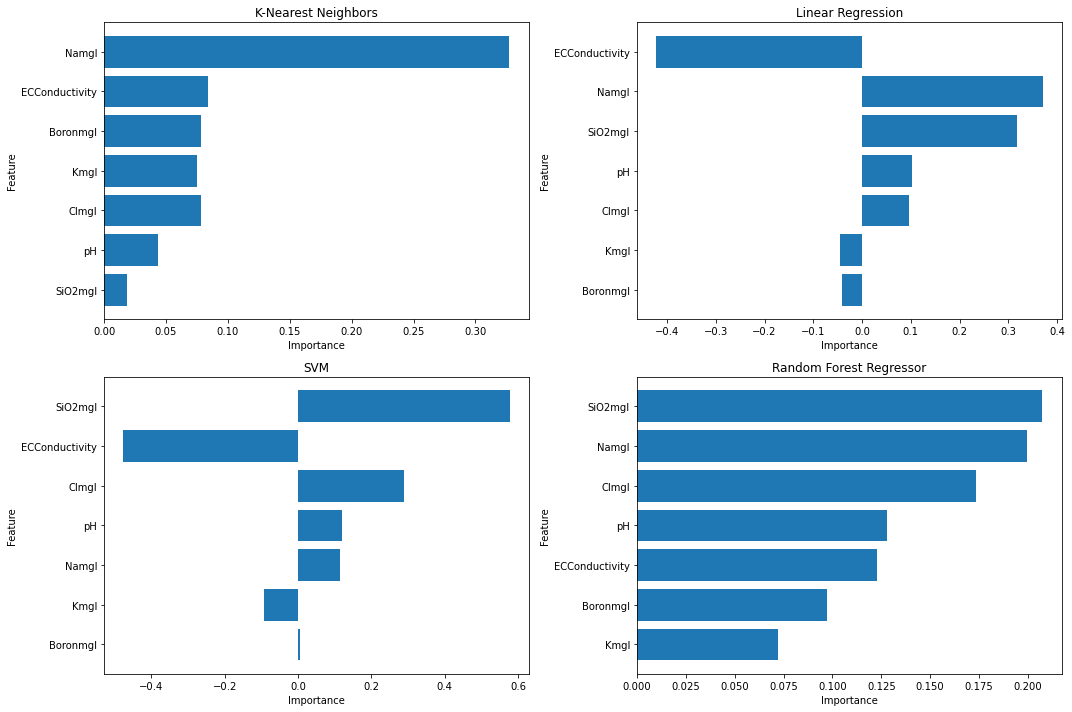

In [127]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.title('Feature Importance (Ranking)')

# KNN
axs[0, 0].barh(range(len(indices)), importances[indices], align='center')
axs[0, 0].set_title('K-Nearest Neighbors')
axs[0, 0].set_yticks(range(len(indices)), [X.columns[i] for i in indices])
axs[0, 0].set_xlabel("Relative Importance")
axs[0, 0].invert_yaxis()

# Linear Regression
axs[0, 1].barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
axs[0, 1].set_title('Linear Regression Feature Importance')
axs[0, 1].set_xlabel('Coefficient (Magnitude)')
axs[0, 1].set_ylabel('Feature')
axs[0, 1].set_title('Linear Regression')

# SVM
axs[1, 0].set_title('SVM Feature Importance')
axs[1, 0].barh(svm_coefficients_df['Feature'], svm_coefficients_df['Coefficient'])
axs[1, 0].set_xlabel('Coefficient (Magnitude)')
axs[1, 0].set_ylabel('Feature')
axs[1, 0].set_title('SVM')


# Random Forest
axs[1, 1].barh(importances_df['Feature'], importances_df['Importance'])
axs[1, 1].set_title('Random Forest Feature Importance')
axs[1, 1].set_xlabel('Importance')
axs[1, 1].set_ylabel('Feature')
axs[1, 1].set_title('Random Forest Regressor')

for ax in axs.flat:
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    ax.invert_yaxis()


plt.tight_layout()
plt.show()

From the Feature Ranking and Conditional Statistics, we can neglect the Boron (mgl) and K (mgl) features.

#### Feature Removal

In [132]:
#Delete the predictor features: Boronmgl and Kmgl

dft_std2 = dft_std.drop(columns=['Boronmgl', 'Kmgl'])
dfp_std2 = dfp_std.drop(columns=['Boronmgl', 'Kmgl'])

# Machine Learning Algorithms

### Compare Algorithms

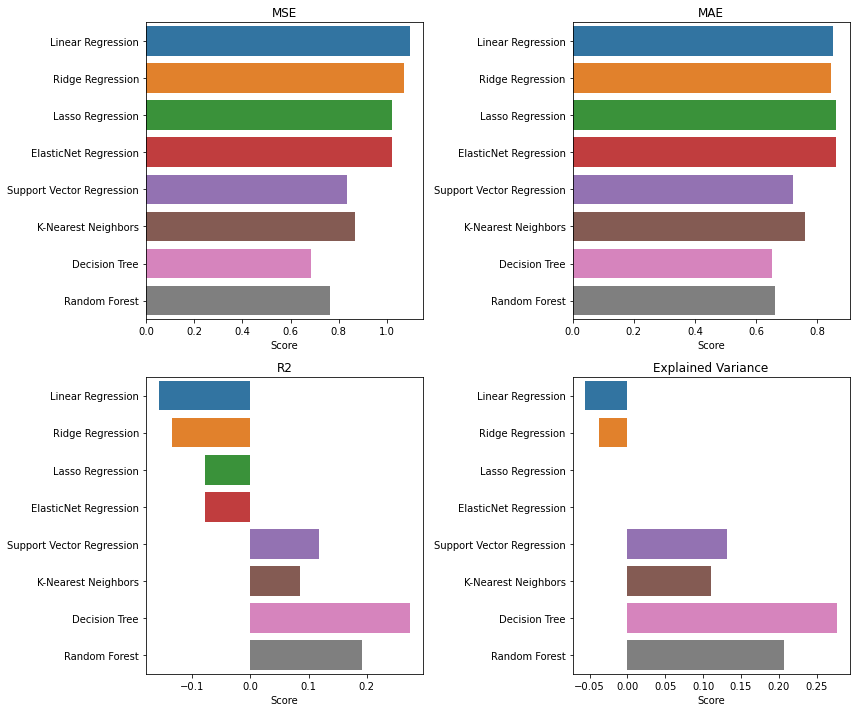

In [139]:
# Prepare the data
X = dft_std2.drop(columns=['Temperature'], axis=1)
y = dft_std2['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Initialize dictionary for metrics
metrics = {
    'MSE': [],
    'MAE': [],
    'R2': [],
    'Explained Variance': []
}

# Train, predict, and evaluate each model
for model in models.values():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics['MAE'].append(mean_absolute_error(y_test, y_pred))
    metrics['R2'].append(r2_score(y_test, y_pred))
    metrics['Explained Variance'].append(explained_variance_score(y_test, y_pred))

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics, index=models.keys())

# Plotting
plt.figure(figsize=(12, 10))

for i, metric in enumerate(metrics_df.columns, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metrics_df[metric], y=metrics_df.index)
    plt.title(metric)
    plt.xlabel('Score')

plt.tight_layout()
plt.show()


Hyperparameter tuning work will be updated below.

# References

1. Haklidir, M. (2019) NIS-GRT, GitHub, https://github.com/haklidir/NIS-GRT/tree/master
2. Pyrcz, M. (2021) PythonNumericalDemos, GeostatsGuy, GitHub, https://github.com/GeostatsGuy
3. GeeksforGeeks (2021) How to Standardize Data in a Pandas DataFrame?, https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/
4. Shetye, A. (2019) Feature Selection with sklearn and Pandas, Medium, https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
5. Leung, K. (2021) Random Forest Regressor Code for Condo Rental Prediction, GitHub, https://gist.github.com/kennethleungty/ea3cc1de4c424a63e318f1ba5dff7c6a
6. NBShare Notebooks. Decision Tree Regression With Hyper Parameter Tuning, https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/ 

# About me

Hi! I'm Adan Malik, an enthusiastic and dynamic petroleum engineer, weaving data and energy to spark innovation. I'm not just drilling for oil - I'm mining insights. <br><br>
My academic journey at NED University of Engineering and Technology was a cocktail of rigorous engineering and research zest, culminating in a standout CGPA of 3.88. I didn't just study Petroleum Engineering; I lived it, earning a distinction in my batch. My dissertation? A deep dive into the stress analysis of completion strings for high pressure high temperature (HPHT) gas wells.<br><br>
Tech-savvy? Absolutely. Python, Prosper, MBAL, Petrel, and a parade of other advanced engineering tools are my playground. I'm also a fan of weaving data narratives through Python for Data Science and have a knack for making Excel and Power BI dance to my tunes.<br><br>
As I navigate the complexities of energy and its future, my notebook here is more than code – it's a chronicle of my journey in reshaping how we understand and utilize energy resources. Welcome to my digital domain, where petroleum engineering meets programming!<br><br>

I can be reached at adansajid.sajid26@gmail.com.<br><br>

P.S. Explore my code, share your thoughts, and let's fuel the future of energy, one line of code at a time.